In [1]:
import math
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style

from regression import normalEquation, extendMatrix, vectorCost, linear, gradient
from statistics import normalizeFeature, variance


In [2]:

style.use('fivethirtyeight')
np.set_printoptions(precision=4)

columns = ["CudaCores", "BaseClock", "BoostClock", "MemorySpeed", "MemoryConfig", "MemoryBandwidth", "BenchmarkSpeed"
           ]

df = pd.read_csv('datasets/GPUbenchmark.csv', header=None)

X = np.array(df.drop(columns=6, axis=1).T)
y = np.array(df.loc[:, 6])

# Compute normalized
normalX = np.array(normalizeFeature(X))
normalY = np.array(normalizeFeature([y]))
print("Y normalized variance {}".format(variance(normalY[0])))
print("X normalized variance {}".format(variance(normalX[0])))


Y normalized variance 1.0000000000000007
X normalized variance 1.0000000000000004


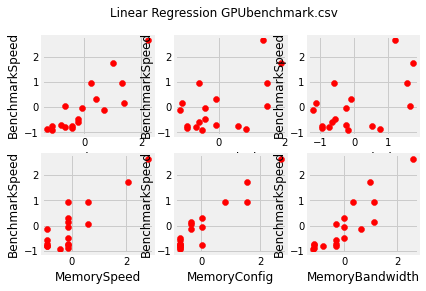

In [3]:

plt.suptitle("Linear Regression {}".format("GPUbenchmark.csv"))
for i, X_ in enumerate(normalX):
    for x_, y_ in zip(X_, normalY[0]):
        pltii = plt.subplot(2, 3, i + 1)
        pltii.scatter(x_, y_, color='r')

        # Set title and labels.
        title = columns[i]
        pltii.set_xlabel(title)
        pltii.set_ylabel(columns[-1])

plt.show()


In [4]:

# Compute beta
Xe = extendMatrix(([xi for xi in normalX]), False)
beta = normalEquation(Xe, y)

# Compute and predict.
testX = normalizeFeature([[2432.0, 1607.0, 1683.0, 8.0, 8.0, 256.0]])
testy = [114.0]
predictY = linear(beta, testX[0])
print("expected: {}, predicated {}".format(testy[0], predictY))

# Compute the cost function
NEcost = vectorCost(beta, Xe, y)
print("cost from normal equation {}".format(NEcost))


expected: 114.0, predicated 81.51236340576071
cost from normal equation 12.396444360915673


In [5]:

# Solve with gradient descent.
errorMargin = NEcost / 100.0  # Compute 1 % of the original cost.
XeFit = []
Xe = extendMatrix(([xi for xi in normalX]), False)
for j in [1.0 / i for i in range(10, 10000, 500)]:
    for n in range(10, 10000, 500):
        optimized = gradient(Xe, beta, y, j, n)

        combinationCost = vectorCost(optimized, Xe, y)

        # Check if within 1 % error margin.
        error = math.fabs(combinationCost - NEcost)
        print("alpha {}, iterations: {} cost : {}".format(
            float(j), n, round(combinationCost, 5)))
        if error < errorMargin:
            XeFit.append([[n, j], combinationCost])

# Extract the best fit beta
XeB = sorted(XeFit, key=itemgetter(1))
error = XeB[0][1]
n, j = XeB[0][0]
print("Best fit with cost of {} for alpha and iteration ({}, {}) .".format(error, j, n))

# Solve gradient decent
beta = gradient(Xe, beta, y, j, n)
predictY = linear(beta, testX[0])
print("expected: {}, predicted {}".format(testy[0], predictY))


alpha 0.1, iterations: 10 cost : 521.94536
alpha 0.1, iterations: 510 cost : 13.33915
alpha 0.1, iterations: 1010 cost : 12.75276
alpha 0.1, iterations: 1510 cost : 12.56502
alpha 0.1, iterations: 2010 cost : 12.4812
alpha 0.1, iterations: 2510 cost : 12.43965
alpha 0.1, iterations: 3010 cost : 12.41854
alpha 0.1, iterations: 3510 cost : 12.40775
alpha 0.1, iterations: 4010 cost : 12.40223
alpha 0.1, iterations: 4510 cost : 12.3994
alpha 0.1, iterations: 5010 cost : 12.39796
alpha 0.1, iterations: 5510 cost : 12.39722
alpha 0.1, iterations: 6010 cost : 12.39684
alpha 0.1, iterations: 6510 cost : 12.39665
alpha 0.1, iterations: 7010 cost : 12.39655
alpha 0.1, iterations: 7510 cost : 12.3965
alpha 0.1, iterations: 8010 cost : 12.39647
alpha 0.1, iterations: 8510 cost : 12.39646
alpha 0.1, iterations: 9010 cost : 12.39645
alpha 0.1, iterations: 9510 cost : 12.39645
alpha 0.00196078431372549, iterations: 10 cost : 4726.54954
alpha 0.00196078431372549, iterations: 510 cost : 578.65308
alpha